# **Regression and its Evaluation**

### Question 1: What is Simple Linear Regression?
- Simple Linear Regression is a statistical method used to understand and predict the relationship between two variables: one independent variable (X) and one dependent variable (Y). It works by fitting a straight line through the data that best represents how changes in X affect Y. The model uses the equation Y = b₀ + b₁X, where b₀ is the intercept and b₁ is the slope, indicating how much Y changes when X increases by one unit. This method is useful when the relationship between the variables is approximately linear. In simple terms, it helps us predict the value of Y based on the value of X by drawing the best possible straight line through the data points.

## Question 2: What are the key assumptions of Simple Linear Regression?
-  Simple Linear Regression relies on several key assumptions to ensure the model works correctly. First, it assumes a linear relationship between the independent variable (X) and the dependent variable (Y), meaning the change in Y can be explained by a straight-line change in X. Second, the residuals (errors) should be independent, meaning one error does not influence another. Third, the residuals must have constant variance, known as homoscedasticity, which means the spread of errors should remain the same across all levels of X. Fourth, the errors should be normally distributed, allowing reliable statistical testing and confidence intervals. Lastly, there should be no significant outliers, as they can distort the regression line and lead to incorrect conclusions. These assumptions help ensure that the regression model is accurate, reliable, and meaningful.

# Question 3: What is heteroscedasticity, and why is it important to address in regression models ?
-  Heteroscedasticity refers to a situation in a regression model where the variance of the residuals (errors) is not constant across all values of the independent variable. In simple words, the spread of errors increases or decreases as X changes. Instead of a uniform scatter of points, the errors form patterns like a cone shape—either widening or narrowing.

It is important to address heteroscedasticity because it violates a key assumption of regression, which expects constant error variance (homoscedasticity). When this assumption is broken, the model’s standard errors become unreliable, leading to incorrect p-values, wrong confidence intervals, and possibly misleading conclusions about which variables are significant. The regression coefficients may still remain unbiased, but the model becomes statistically weak and less trustworthy. Therefore, detecting and correcting heteroscedasticity is essential to ensure accurate and reliable regression results.




# Question 4: What is Multiple Linear Regression?
-   Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃… ). It extends simple linear regression by allowing multiple factors to influence the output instead of just one. The model fits a plane (or hyperplane) rather than a line and uses the equation Y = b₀ + b₁X₁ + b₂X₂ + b₃X₃ + …, where each coefficient shows how much Y changes when that particular predictor changes, while keeping others constant. This method is useful when a single variable cannot explain the outcome, and you need a combination of variables—for example, predicting house prices using area, number of rooms, and location. Multiple linear regression helps understand each factor’s contribution and makes more accurate predictions when multiple predictors are involved.

##Question 5: What is polynomial regression, and how does it differ from linear regression ?
-   Polynomial Regression is a type of regression technique that models the relationship between the independent variable (X) and the dependent variable (Y) as an nth-degree polynomial instead of a straight line. It is used when the data shows a curved or non-linear pattern that simple linear regression cannot capture. The model uses equations like:
**Y= b0 +b1X +b2X² +b3Xⁿ+…**

 The main difference between polynomial regression and linear regression is the shape of the relationship they capture. Linear regression fits a straight line, assuming Y changes at a constant rate with X. In contrast, polynomial regression fits a curved line, allowing the rate of change to vary, which makes it suitable for more complex, non-linear patterns. Although polynomial regression introduces curve, it is still considered a form of linear model because the coefficients are linear. Overall, polynomial regression provides flexibility to model curved trends, while simple linear regression is limited to straight-line relationships.


Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
-  



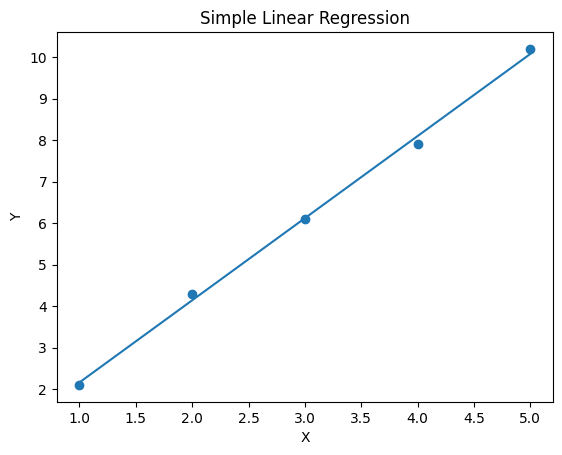

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)   # Independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plot data points
plt.scatter(X, Y)
plt.plot(X, Y_pred)

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")

# Show plot
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent variables
X = df[['Area', 'Rooms']]

# Dependent variable
Y = df['Price']
model = LinearRegression()
model.fit(X, Y)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
# VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif_data)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


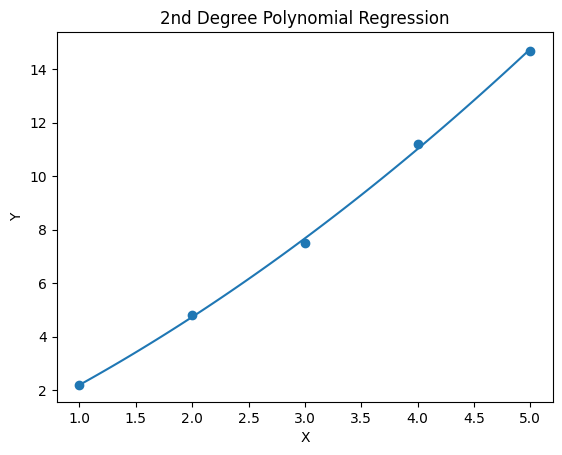

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Create smooth curve values
X_curve = np.linspace(1, 5, 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
Y_curve = model.predict(X_curve_poly)

# Plot data points and polynomial curve
plt.scatter(X, Y)
plt.plot(X_curve, Y_curve)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.


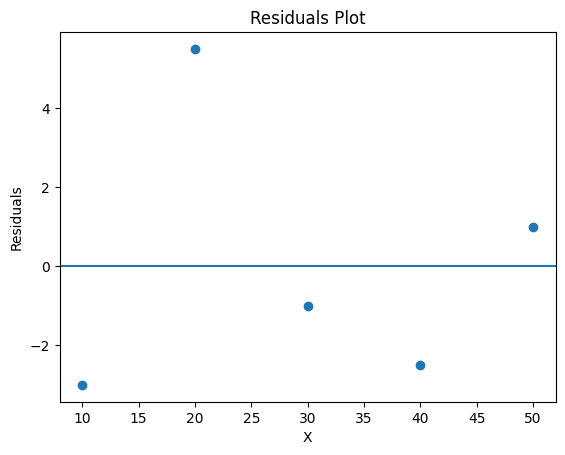

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Residuals plot
plt.scatter(X, residuals)
plt.axhline(y=0)   # reference line at zero
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- As a data scientist working for a real estate company, I first check the regression model for problems like heteroscedasticity and multicollinearity.

To detect heteroscedasticity, I examine the residuals plot. If the spread of residuals increases or decreases with the predicted values, it indicates heteroscedasticity. To fix this issue, I apply transformations such as log or square root on the target variable (house price). I can also use robust regression techniques or weighted least squares to stabilize the variance.

To detect multicollinearity, I calculate the Variance Inflation Factor (VIF). If VIF values are high, it means the independent variables are highly correlated. To resolve this, I remove or combine correlated features such as area and number of rooms. I may also use regularization techniques like Ridge or Lasso regression to reduce the impact of multicollinearity.

Finally, I validate the model using cross-validation and evaluate its performance using metrics like RMSE and R² score. These steps help ensure a stable, reliable, and robust house price prediction model.

